In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

import util

FOLDER = "/Users/brendan/Documents/projects/trails_project/data/"

SIZE = 10000
STEPS = 40000

datafiles = [
    "SVD|2025-07-21/data.json",
]

In [ ]:
dfs = [
    util.load_data(FOLDER + datafile) for datafile in datafiles
]
df = pd.concat(dfs)
util.describe(df)
df.columns

In [3]:
recoveries = [0.001, 0.0005]
steps = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
numLocations = [10]
seedLocations = [1]
boundaryConditions = ["PERIODIC", "SOLID"]



i = 0
for numLocation in numLocations:
    for seedLocation in seedLocations:
        for boundaryCondition in boundaryConditions:
            for recovery in recoveries:
                for step in steps:
                    print(i, " --------- ", recovery, numLocation, seedLocation, boundaryCondition, step, end='')

                    try:

                        _all = df[
                            (df["settings.patchRecovery"] == recovery) &
                            # (df["settings.improvementLogic"] == "LINEAR") &
                            (df["settings.numLocations"] == numLocation) &
                            (df["settings.randomSeedLocations"] == seedLocation) &
                            (df["settings.boundaryConditions"] == boundaryCondition)
                        ]
    
                        U, S, Vh = util.svd(_all, step, plot=False, dynamics=False)
                        s = S**2/sum(S**2)

                        print("s:", s[0], "S:", (S[0] / sum(S)))
        
                        i += 1
                    except:
                        print(" (skipping)")


0  ---------  0.001 10 1 PERIODIC 5000s: 0.6066582508467584 S: 0.15813753388354
1  ---------  0.001 10 1 PERIODIC 10000s: 0.5860955568842364 S: 0.15295018503549962
2  ---------  0.001 10 1 PERIODIC 15000s: 0.5866320050691443 S: 0.1532995028231093
3  ---------  0.001 10 1 PERIODIC 20000s: 0.5903361021144258 S: 0.1558051515123401
4  ---------  0.001 10 1 PERIODIC 25000s: 0.6013667373236592 S: 0.1597446913471916
5  ---------  0.001 10 1 PERIODIC 30000s: 0.605696372919975 S: 0.1615390357742711
6  ---------  0.001 10 1 PERIODIC 35000s: 0.6052579033550363 S: 0.16222726965956288
7  ---------  0.001 10 1 PERIODIC 40000s: 0.6101082312804541 S: 0.16345255240977596
8  ---------  0.0005 10 1 PERIODIC 5000s: 0.7436567351791019 S: 0.2025030419534757
9  ---------  0.0005 10 1 PERIODIC 10000s: 0.720790024512717 S: 0.19810625393449158
10  ---------  0.0005 10 1 PERIODIC 15000s: 0.7022264673360178 S: 0.19224215880734635
11  ---------  0.0005 10 1 PERIODIC 20000s: 0.6898490814051923 S: 0.1884665518793112

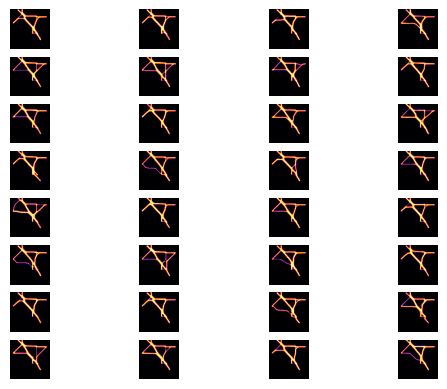

In [5]:
util.plot_patches(df[df["steps"] == 10000])

In [11]:
_all.shape

(128, 25)

In [1]:
steps = 20000
_all = df[
    (df["settings.patchRecovery"] == 0.001) &
    (df["settings.numLocations"] == 10) &
    (df["settings.randomSeedLocations"] == 2) &
    (df["settings.boundaryConditions"] == "SOLID") &
    (df["settings.recoveryLogic"] == "LINEAR") &
    (df["settings.searchStrategy"] == "GRID_WALK_8") &
    (df["settings.maxCost"] == 2.0)
].copy()

U, S, Vh = util.svd(_all, steps, dynamics=True)

NameError: name 'df' is not defined

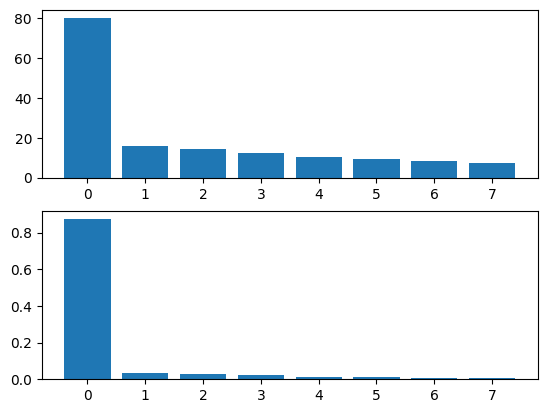

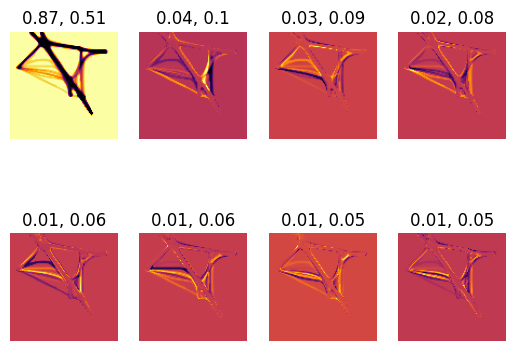

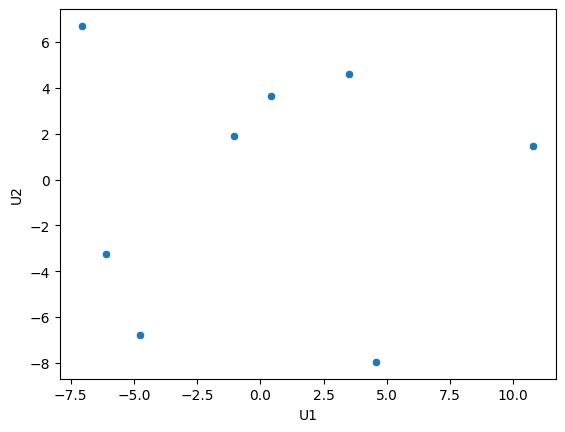

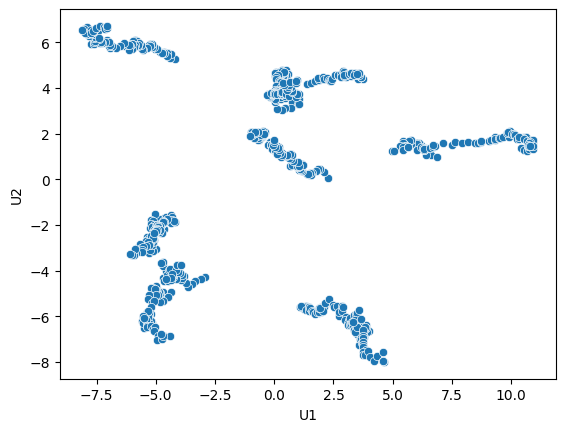

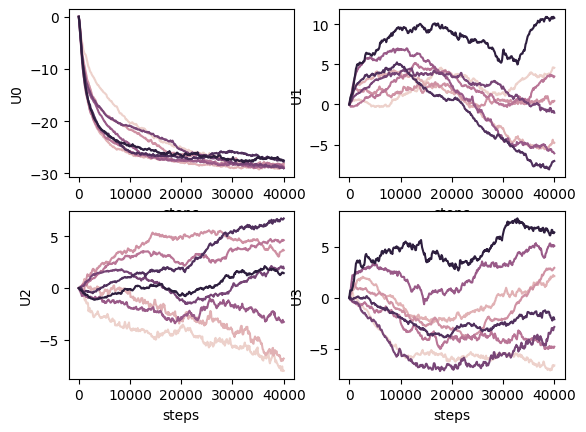

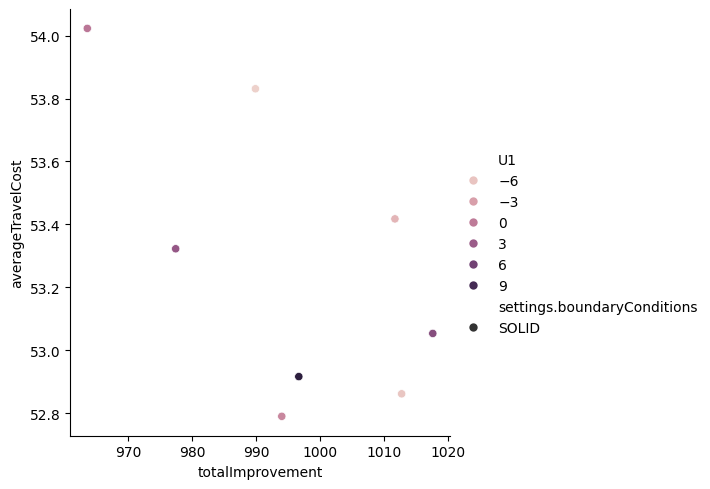

In [10]:
_all = df[
    (df["settings.patchRecovery"] == 0.0005) &
    # (df["ratio"] == 100.0) &
    (df["settings.numLocations"] == 10) &
    (df["settings.randomSeedLocations"] == 1) &
    (df["settings.boundaryConditions"] == "SOLID") &
    (df["settings.recoveryLogic"] == "LINEAR")
].copy()

U, S, Vh = util.svd(_all, 40000, dynamics=True)

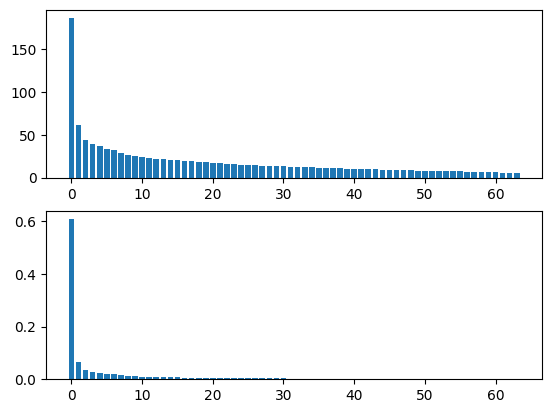

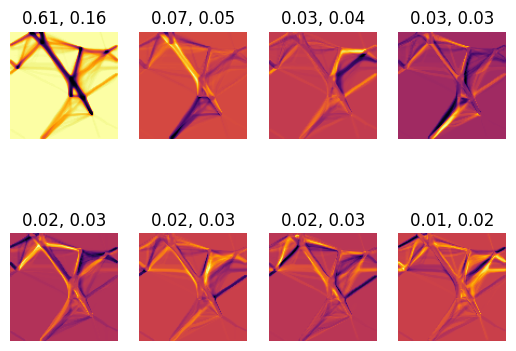

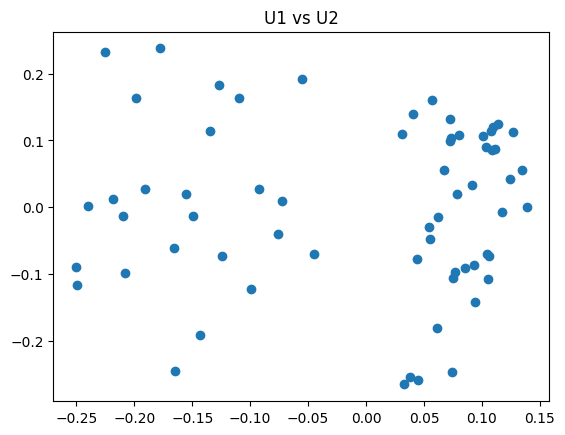

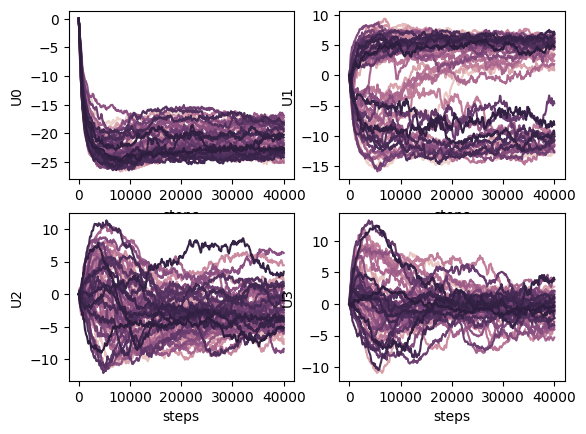

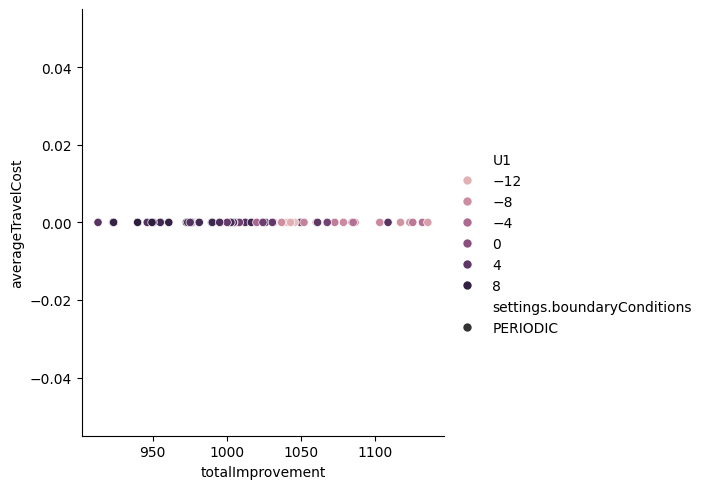

In [61]:
_fast = df[
    (df["settings.patchRecovery"] == 0.001) &
    # (df["ratio"] == 100.0) &
    (df["settings.numLocations"] == 10) &
    (df["settings.randomSeedLocations"] == 1) &
    (df["settings.boundaryConditions"] == "PERIODIC") &
    (df["settings.recoveryLogic"] == "LINEAR")
].copy()

Uf, Sf, Vhf = util.svd(_fast, 5000, dynamics=True)

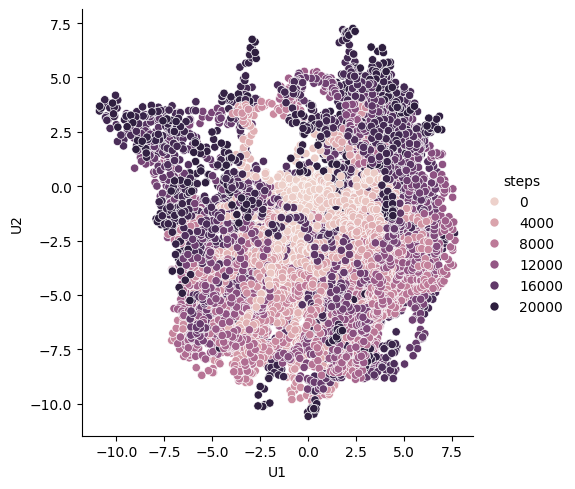

In [21]:
sns.relplot(_all[_all["steps"] >= 000], x="U1", y="U2", hue="steps")

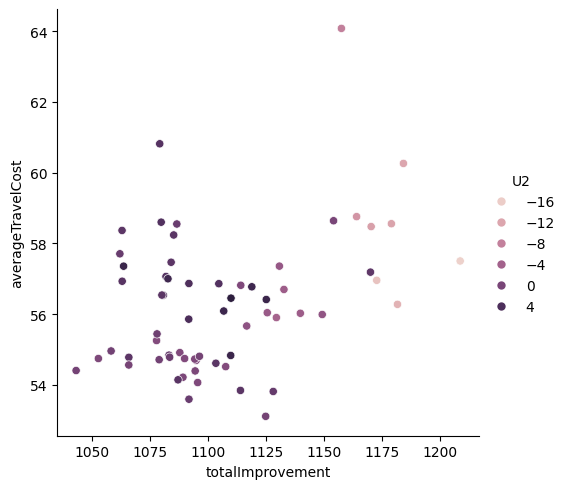

In [74]:
sns.relplot(_slow[_slow["steps"] == 40000], y="averageTravelCost", x="totalImprovement", hue="U2")

<Axes: ylabel='Count'>

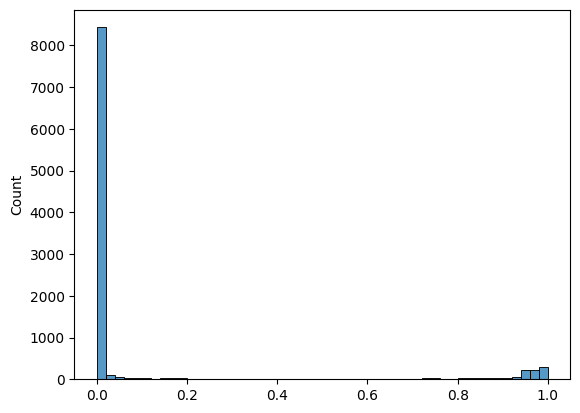

In [80]:
sns.histplot(_fast[_fast["steps"] == 40000].iloc[0]["patches"], bins=50)